In [30]:
import numpy as np
from scipy.sparse import coo_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [38]:
kijz = list(range(0,15))

In [97]:
dic = {}
for i in range(0,15):
    key = kijz[i]
    l = random.sample(range(0,20), 4)
    dic[key] = l

In [98]:
for key in dic.keys():
    print(dic[key])

[8, 18, 14, 2]
[7, 18, 13, 14]
[13, 3, 10, 15]
[12, 14, 15, 5]
[16, 10, 15, 14]
[12, 2, 3, 19]
[1, 16, 0, 8]
[6, 18, 13, 12]
[5, 8, 1, 18]
[9, 8, 19, 11]
[0, 17, 1, 3]
[10, 5, 14, 7]
[9, 2, 17, 19]
[6, 9, 8, 4]
[15, 8, 13, 9]


In [99]:
r = 0 # the index of the row of the matrix
c = 0 # the index of the columns of the matrix
counter = 0
row_indices = []
column_indices = []
matrix_elements = []

for key_r in dic.keys(): # key_r is the key for the rows
    x = dic[key_r]
    for key_c in dic.keys(): # key_c is the key for the columns
        if c >= r:
            y = dic[key_c]
            common_set = list(set(x) & set(y))
            common_set_size = len(common_set)
            if common_set_size > 0:
                row_indices.append(r)
                column_indices.append(c)
                matrix_elements.append(common_set_size)
        c = c + 1
    r = r + 1
    c = 0

In [100]:
row  = np.array(row_indices)
col  = np.array(column_indices)
val = np.array(matrix_elements)
mx = coo_matrix((val, (row, col)), shape=(15, 15)).toarray()
mx

array([[4, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1],
       [0, 4, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1],
       [0, 0, 4, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2],
       [0, 0, 0, 4, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1],
       [0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1],
       [0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 1, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 2, 1, 2, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]])

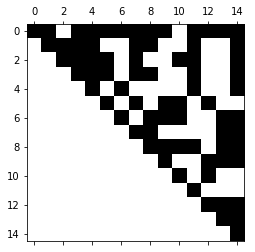

In [101]:
plt.spy(mx)
plt.show()

In [102]:
row_indices_2 = row_indices
column_indices_2 = column_indices
matrix_elements_2 = matrix_elements

for i in range(0, len(row_indices)):
    if row_indices[i] != column_indices[i]:
        column_indices_2.append(row_indices[i])
        row_indices_2.append(column_indices[i])
        matrix_elements_2.append(matrix_elements[i])

In [103]:
row2  = np.array(row_indices_2)
col2  = np.array(column_indices_2)
val2 = np.array(matrix_elements_2)
mx2 = coo_matrix((val2, (row2, col2)), shape=(15, 15)).toarray()
mx2

array([[4, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1],
       [2, 4, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1],
       [0, 1, 4, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2],
       [1, 1, 1, 4, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1],
       [1, 1, 2, 2, 4, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1],
       [1, 0, 1, 1, 0, 4, 0, 1, 0, 1, 1, 0, 2, 0, 0],
       [1, 0, 0, 0, 1, 0, 4, 0, 2, 1, 2, 0, 0, 1, 1],
       [1, 2, 1, 1, 0, 1, 0, 4, 1, 0, 0, 0, 0, 1, 1],
       [2, 1, 0, 1, 0, 0, 2, 1, 4, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 4, 0, 0, 2, 2, 2],
       [0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 4, 0, 1, 0, 0],
       [1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0],
       [1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 4, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 4, 2],
       [1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 4]])

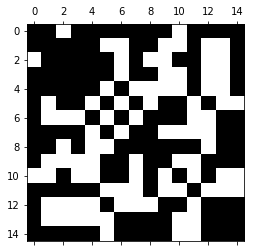

In [104]:
plt.spy(mx2)
plt.show()